# **HEART DISEASE DATASET (STAGE-2)**

### **DATA ACQUISITION**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hr1=pd.read_csv('Heart_Dataset.csv',on_bad_lines='skip') 
hr1=hr1.rename(columns={'age':'AGE','sex':'SEX','cp':'CP','trestbps':'RBP','chol':'SCH','fbs':'FBS','restecg':'RES','thalach':'MHR','exang':'EIA','oldpeak':'OPK','slope':'PES','ca':'VCA','thal':'THA','LB1':'LB'})
hr1.head()

,AGE,SEX,CP,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,LB
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


**OUTLIER DETECTION AND REMOVAL**

In [ ]:
import plotly.express as px
labels=["Healthy","Not Healthy"]

healthy_or_not = hr1['LB'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]
print(healthy_or_not[0])
print(values)

fig = px.pie(values=hr1['LB'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"],title="Healthy vs Heart Disease")
fig.show()


526
[526, 499]


<Axes: >

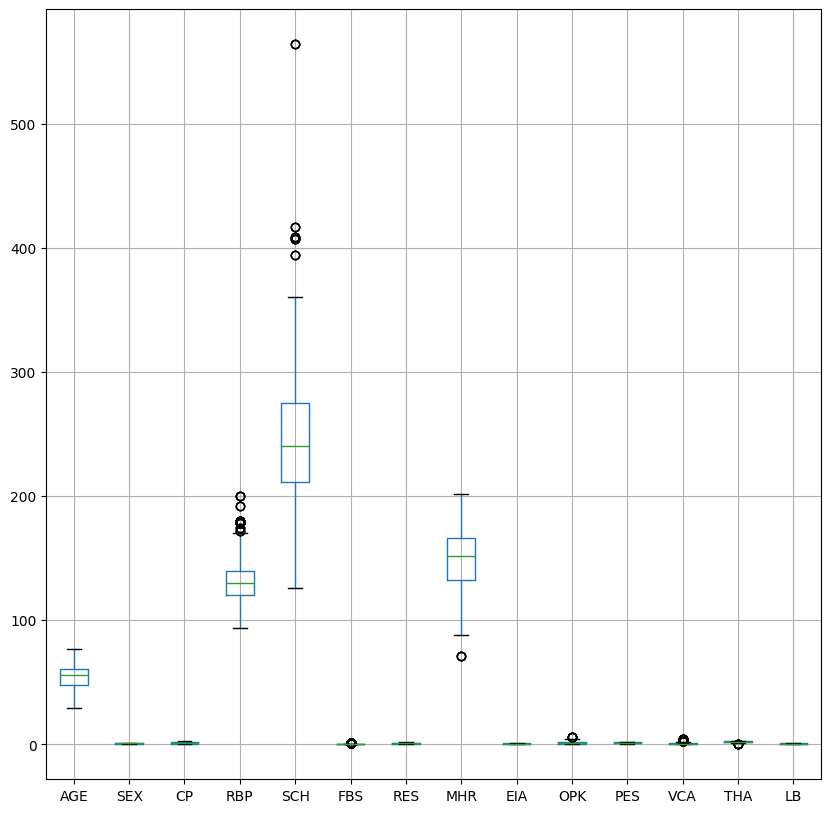

In [ ]:
hr1.boxplot(figsize=(10,10))

<Axes: >

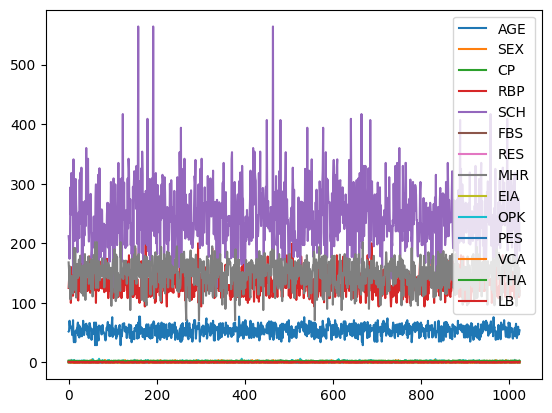

In [ ]:
hr1.plot()

In [ ]:
columns = ['AGE', 'RBP', 'SCH', 'MHR', 'OPK','SEX', 'CP', 'FBS', 'RES', 'EIA', 'PES','VCA','THA','LB']

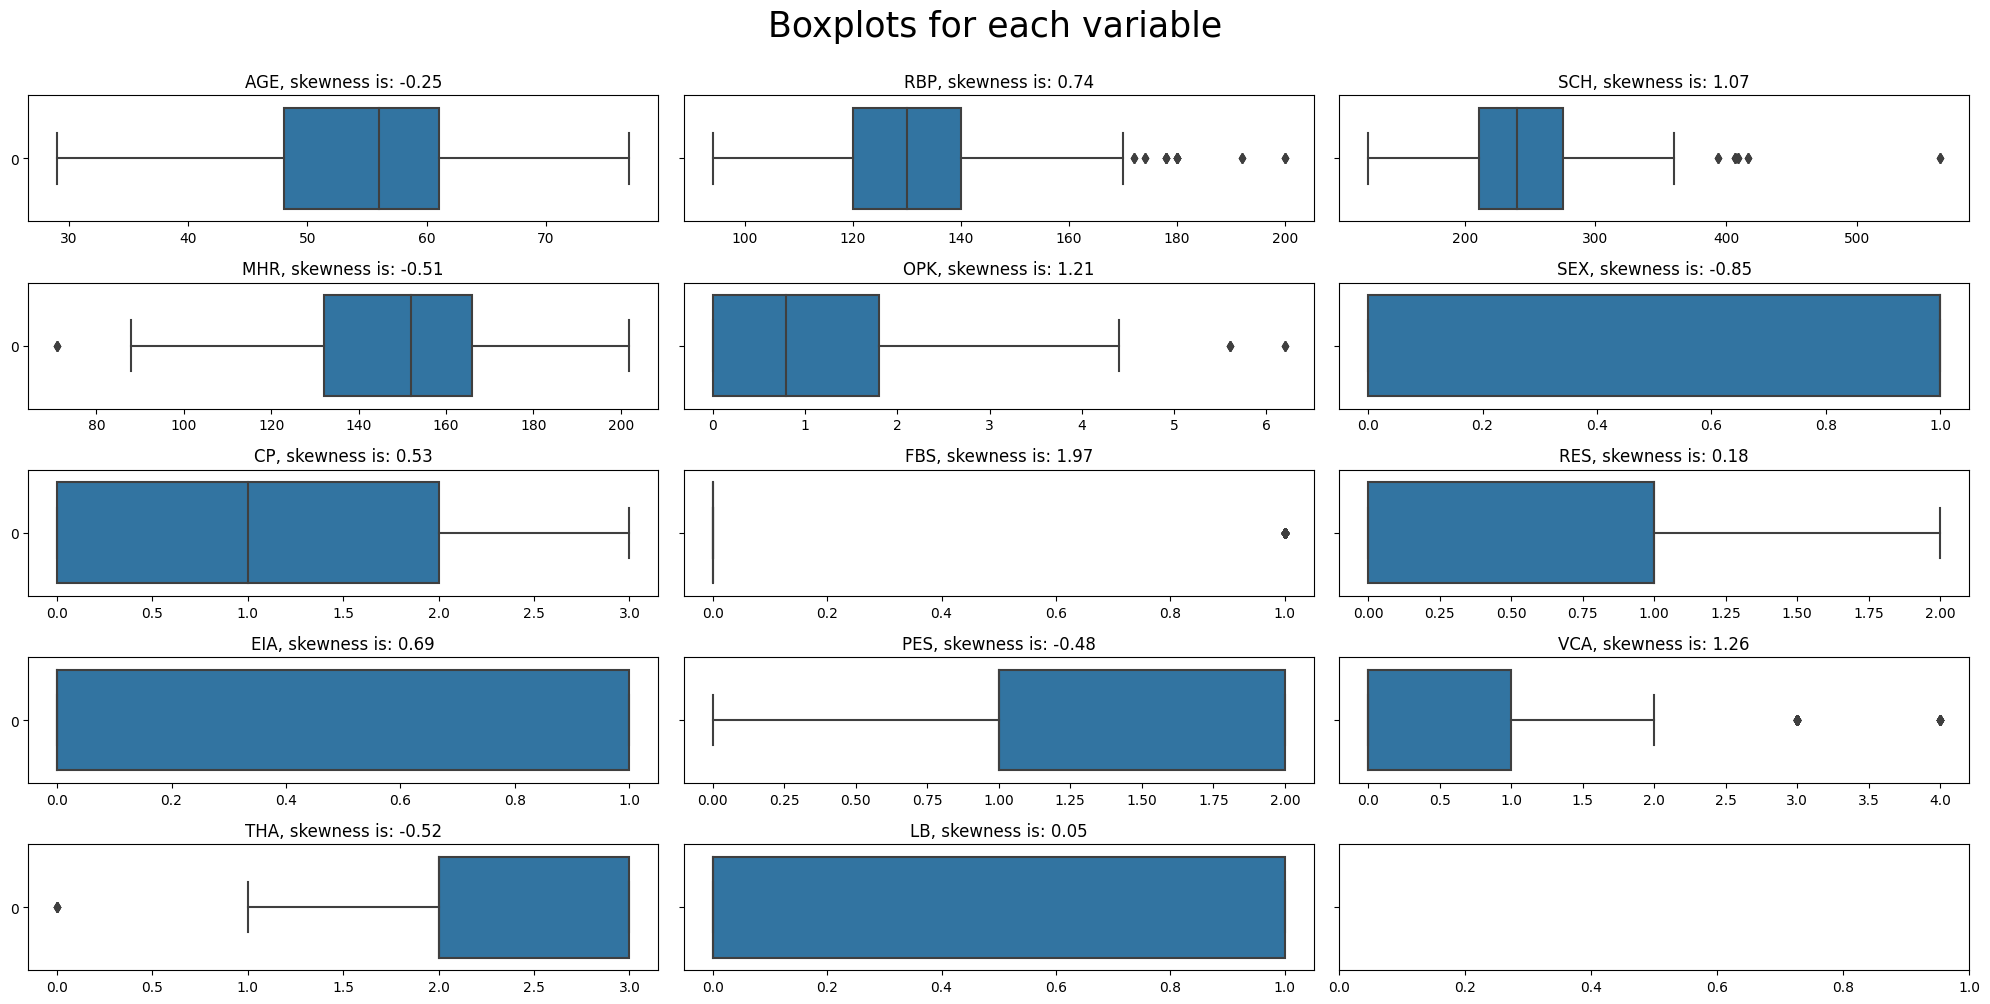

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=hr1, columns_list=columns, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col][z_scores > threshold] = np.nan
    df.dropna(inplace=True)
columns = ['AGE', 'RBP', 'SCH', 'MHR', 'OPK','SEX', 'CP', 'FBS', 'RES', 'EIA', 'PES','VCA','THA','LB']
remove_outliers_zscore(hr1, columns)

In [ ]:
hr1.shape

(969, 14)

## **STAGE-2**

<Axes: >

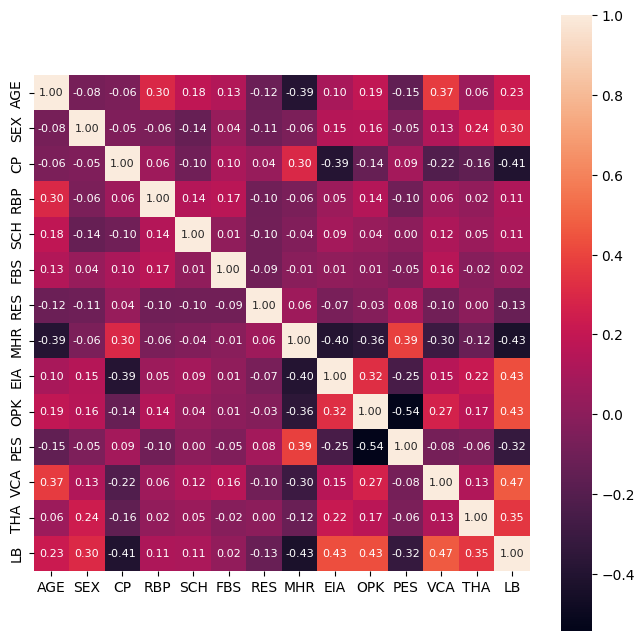

In [ ]:
correlation =hr1.corr()
plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.2f',annot=True,annot_kws={'size':8})

In [ ]:
print(correlation['LB'])

AGE    0.227225
SEX    0.303739
CP    -0.408999
RBP    0.114757
SCH    0.112342
FBS    0.023629
RES   -0.127580
MHR   -0.429920
EIA    0.429825
OPK    0.431854
PES   -0.322791
VCA    0.466639
THA    0.352502
LB     1.000000
Name: LB, dtype: float64












## **DATA PREDICTION**

In [ ]:
X=hr1.iloc[:,[0,1,3,4,5,8,9,11,12]].values

In [ ]:
hr1['LB']=hr1['LB'].replace([0,1],[1,0])

In [ ]:
y=hr1.iloc[:,-1].values

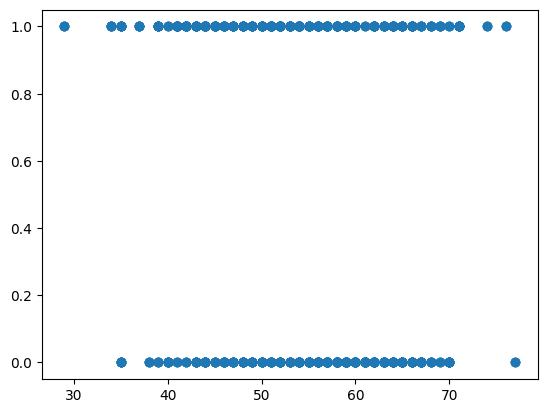

In [ ]:
plt.scatter(X[:,0],y)

In [ ]:
Xdf=pd.DataFrame(X)
Xdf.shape

(969, 9)

In [ ]:
y.shape

(969,)

In [ ]:
ydf=pd.DataFrame(y)
ydf.head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


## **MACHINE LEARNING ALGORITHMS**





In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import time

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
models = [('Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ]
param_grids = [
    {'var_smoothing': np.logspace(0,-9, num=100)},
    {'max_depth': range(1,7),'criterion': ['gini', 'entropy']},
    {'n_estimators': [10, 50, 100], 
     'max_features': ['sqrt', 'log2'],
     'max_depth':range(1,7)}]
best_params = {}
for i, (name, model) in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=10, scoring='accuracy')
    grid_search.fit(X, y)
    best_params[name] = grid_search.best_params_
print("BEST PARAMETERS:")
for key, value in best_params.items():
    print(key, value)


BEST PARAMETERS:
Naive Bayes {'var_smoothing': 6.579332246575682e-07}
Decision Tree {'criterion': 'gini', 'max_depth': 6}
Random Forest {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
ada_param_grid = {'n_estimators': [10,15,5], 'learning_rate': [ 0.1, 1]}
xgb_param_grid = {'n_estimators': [10,5,15], 'learning_rate': [0.1, 1], 'max_depth': [3, 4]}
ada = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
ada_grid = GridSearchCV(estimator=ada, param_grid=ada_param_grid, cv=10, scoring='accuracy')
ada_grid.fit(X, y)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=10, scoring='accuracy')
xgb_grid.fit(X, y)
print("Best parameters for AdaBoost: ", ada_grid.best_params_)
print("Best parameters for XGBoost: ", xgb_grid.best_params_)

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 15}
Best parameters for XGBoost:  {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 15}


In [ ]:
models_new=[]
models_new.append(('NB',GaussianNB(var_smoothing = 6.579332246575682e-07)))
models_new.append(('MLP',MLPClassifier(activation= 'logistic', alpha = 0.01, hidden_layer_sizes = (20,15,10),learning_rate='constant',solver='adam',random_state=5)))
models_new.append(('DT',DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=5)))
models_new.append(('RF',RandomForestClassifier(n_estimators=100,max_depth=6,max_features='log2',random_state=5)))
models_new.append(('SVM',SVC(kernel='linear',gamma = 1,C= 1,random_state=5)))
models_new.append(('XGboost',XGBClassifier(learning_rate=1,n_estimators=15,max_depth=4,random_state=0)))
models_new.append(('Adaboost',AdaBoostClassifier(learning_rate=1,n_estimators=15,random_state=7)))

## **BASELINE IMPLEMENTATION**

**10(k)-fold**

In [ ]:
import time
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
for name,model in models_new:
    st=time.time()
    kfold=KFold(n_splits=10)

    acc=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    accuracy[name]=(acc.mean())
    et=time.time()
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.7924935567010309
MLP 0.6615871993127147
DT 0.9122852233676975
RF 0.931872852233677
SVM 0.8038874570446735
XGboost 0.9855240549828179
Adaboost 0.8389819587628866

Time(10-K):
NB 0.03228044509887695
MLP 5.024880409240723
DT 0.03415060043334961
RF 2.1833243370056152
SVM 313.37943840026855
XGboost 0.16504335403442383
Adaboost 0.3602452278137207


**VARIANCE AND STANDARD DEVIATION**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True)
variances = dict()
std_devs = dict()

for name, model in models_new:
    fold_variances = []
    fold_std_devs = []

    for fold_num, (train_indices, test_indices) in enumerate(kf.split(X)):
        model.fit(X[train_indices], y[train_indices])
        y_pred = model.predict(X[test_indices])
        mse = mean_squared_error(y[test_indices], y_pred)
        variance = np.var(y[test_indices] - y_pred)
        std_dev = np.sqrt(mse)

        fold_variances.append(variance)
        fold_std_devs.append(std_dev)
  
    variances[name] = (np.mean(fold_variances))/10
    std_devs[name] = (np.mean(fold_std_devs))/10


print("\nVariance:")
for key, value in variances.items():
    print(key, value)

print("\nStandard Deviation:")
for key, value in std_devs.items():
    print(key, value)



Variance:
NB 0.019868366280511564
MLP 0.02241249328361734
DT 0.007763898368398754
RF 0.007735191483331562
SVM 0.019431277382175458
XGboost 0.0007077660388694042
Adaboost 0.01693889973843011

Standard Deviation:
NB 0.044989936859368654
MLP 0.060938789743449975
DT 0.027178170418335267
RF 0.027753993598709968
SVM 0.04423912077486835
XGboost 0.0052326991485229495
Adaboost 0.04127272126805748


**50-50**

In [ ]:
import time
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.756701030927835
MLP 0.5257731958762887
DT 0.8701030927835052
RF 0.9051546391752577
SVM 0.8082474226804124
XGboost 0.9298969072164949
Adaboost 0.8268041237113402

Time(10-K):
NB 0.0023713111877441406
MLP 0.0734860897064209
DT 0.0029196739196777344
RF 0.31685471534729004
SVM 10.984780550003052
XGboost 0.013675212860107422
Adaboost 0.03392457962036133


**60-40**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.7577319587628866
MLP 0.5180412371134021
DT 0.8969072164948454
RF 0.9201030927835051
SVM 0.7938144329896907
XGboost 0.9432989690721649
Adaboost 0.8273195876288659

Time(10-K):
NB 0.0038013458251953125
MLP 0.05097174644470215
DT 0.002314329147338867
RF 0.20190811157226562
SVM 10.899766206741333
XGboost 0.03732180595397949
Adaboost 0.05174756050109863


**70-30**

In [ ]:

accuracy=dict()
precision=dict()
recall=dict()
time=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.7731958762886598
MLP 0.5120274914089347
DT 0.8865979381443299
RF 0.9106529209621993
SVM 0.8144329896907216
XGboost 0.9381443298969072
Adaboost 0.8213058419243986

Time(10-K):
NB 0.0021636486053466797
MLP 0.06075406074523926
DT 0.0025207996368408203
RF 0.2057805061340332
SVM 27.71725296974182
XGboost 0.01631641387939453
Adaboost 0.03585696220397949


**80-20**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8350515463917526
MLP 0.5309278350515464
DT 0.9278350515463918
RF 0.9175257731958762
SVM 0.8608247422680413
XGboost 0.9896907216494846
Adaboost 0.9020618556701031

Time(10-K):
NB 0.005280971527099609
MLP 0.05623483657836914
DT 0.0027277469635009766
RF 0.22923016548156738
SVM 26.370086669921875
XGboost 0.027770042419433594
Adaboost 0.06895875930786133


In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
f1score=dict()
roc=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)
    
    precision[name]=metrics.precision_score(y_test, y_pred,average='micro')
    f1score[name]=metrics.f1_score(y_test,y_pred)
    recall[name]=metrics.recall_score(y_test, y_pred,average='micro')
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc[name]=auc(fpr, tpr)
    tt[name]=et-st



print("\nPRECISON:")
for key,value in precision.items():
    print(key,value)

print("\nF1 SCORE:")
for key,value in f1score.items():
    print(key,value)

print("\nRECALL:")
for key,value in recall.items():
    print(key,value)

print("\nROC:")
for key,value in roc.items():
    print(key,value)
    
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


PRECISON:
NB 0.8711340206185567
MLP 0.5412371134020618
DT 0.9278350515463918
RF 0.9536082474226805
SVM 0.8814432989690721
XGboost 1.0
Adaboost 0.8711340206185567

F1 SCORE:
NB 0.8826291079812207
MLP 0.7023411371237458
DT 0.9326923076923078
RF 0.9569377990430622
SVM 0.892018779342723
XGboost 1.0
Adaboost 0.8780487804878048

RECALL:
NB 0.8711340206185567
MLP 0.5412371134020618
DT 0.9278350515463918
RF 0.9536082474226805
SVM 0.8814432989690721
XGboost 1.0
Adaboost 0.8711340206185567

ROC:
NB 0.8689673622257892
MLP 0.5
DT 0.9281968967362226
RF 0.9537185660781166
SVM 0.8793472445157837
XGboost 1.0
Adaboost 0.8723916532905297

Time(10-K):
NB 0.005860328674316406
MLP 0.06075334548950195
DT 0.002757549285888672
RF 0.21667790412902832
SVM 61.87136459350586
XGboost 0.0462496280670166
Adaboost 0.04605817794799805


## **VOTING IMPLEMENTATION**

**10(k)-fold**

In [ ]:
from sklearn.ensemble import VotingClassifier
nb1 = GaussianNB(var_smoothing=1e-9)
nb2 = GaussianNB(var_smoothing=1e-5)
nb3 = GaussianNB(var_smoothing=1e-5)
voting_clfnb = VotingClassifier(estimators=[('naivebayes1', nb1), ('naivebayes2', nb2),('naivebayes3', nb3)], voting='hard')

In [ ]:
mlp1 = MLPClassifier(activation='relu',hidden_layer_sizes=(10,8,6),verbose=False,learning_rate_init=0.01,max_iter=10)
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(15,10,8),verbose=False,learning_rate_init=0.01,max_iter=100)
mlp3 = MLPClassifier(activation='relu',hidden_layer_sizes=(15,10,8),verbose=False,learning_rate_init=0.01,max_iter=50)
voting_clfmlp = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2),('multilp3', mlp3)], voting='hard')

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=11)
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
voting_clfdt = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3)], voting='hard')

In [ ]:
rfc1 = RandomForestClassifier( max_depth=1)
rfc2 = RandomForestClassifier( max_depth=2,random_state=7)
voting_clfrf = VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2)], voting='hard')

In [ ]:
svm1 = SVC(kernel='linear', C=1,gamma=1)
svm2 = SVC(kernel='rbf', gamma=3, C=0.1)
voting_clfsvm = VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2)], voting='hard')

In [ ]:
xg1 = XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.1)
xg2 = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.2)
xg3 = XGBClassifier(n_estimators=15, max_depth=4, learning_rate=0.15)
voting_clfxgb = VotingClassifier(estimators=[('xgb1',xg1), ('xgb2',xg2), ('xgb3',xg3)],voting='hard')

In [ ]:
ada1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=10,learning_rate=1.0)
ada2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=5,learning_rate=0.5)
ada3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=15,learning_rate=0.75)
voting_clfada = VotingClassifier(estimators=[('ada1', ada1), ('ada2', ada2), ('ada3', ada3)],voting='hard')

In [ ]:
votingmodel=[]
votingmodel.append(('MLP',VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')))
votingmodel.append(('DT',VotingClassifier(estimators=[('clf1', clf1),('clf2',clf2)], voting='hard')))
votingmodel.append(('RF',VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2)], voting='hard')))
votingmodel.append(('SVC',VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2)], voting='hard')))
votingmodel.append(('XGBoost',VotingClassifier(estimators=[('xgb1',xg1), ('xgb2',xg2), ('xgb3',xg3)],voting='hard')))
votingmodel.append(('AdaBoost',VotingClassifier(estimators=[('ada1', ada1), ('ada2', ada2), ('ada3', ada3)], voting='hard')))

**10(K)- Fold**

In [ ]:
from sklearn.datasets import make_classification
def votingclffold(voting_clf):
  X, y = make_classification(n_samples=900, n_features=9, random_state=43) 
  kfold = KFold(n_splits=10, shuffle=True, random_state=43) 
  scores = cross_val_score(voting_clf, X, y, cv=kfold)
  accuracy=scores.mean()
  return accuracy

print("Voting(10-fold)- NB ",votingclffold(voting_clfnb))
print("Voting(10-fold)- MLP ",votingclffold(voting_clfmlp))
print("Voting(10-fold)- DT ",votingclffold(voting_clfdt))
print("Voting(10-fold)- RF ",votingclffold(voting_clfrf))
print("Voting(10-fold)- SVM ",votingclffold(voting_clfsvm))
print("Voting(10-fold)- XGBoost ",votingclffold(voting_clfxgb))
print("Voting(10-fold)- AdaBoost ",votingclffold(voting_clfada))

Voting(10-fold)- NB  0.8877777777777778
Voting(10-fold)- MLP  0.8866666666666667
Voting(10-fold)- DT  0.8922222222222222
Voting(10-fold)- RF  0.8911111111111112
Voting(10-fold)- SVM  0.7977777777777778
Voting(10-fold)- XGBoost  0.8933333333333333
Voting(10-fold)- AdaBoost  0.9022222222222223


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(484, 9)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:100], y_train[:100])
nb2.fit(X_train_df.iloc[100:250], y_train[100:250])
nb3.fit(X_train_df.iloc[250:484], y_train[250:484])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(50-50)- NB ",(accuracy))


Voting(50-50)- NB  0.7835051546391752


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def votingclf_fiftysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(50-50)- MLP ",votingclf_fiftysplit(voting_clfmlp))
print("Voting(50-50)- DT ",votingclf_fiftysplit(voting_clfdt))
print("Voting(50-50)- RF ",votingclf_fiftysplit(voting_clfrf))
print("Voting(50-50)- SVM ",votingclf_fiftysplit(voting_clfsvm))
print("Voting(50-50)- XGBoost ",votingclf_fiftysplit(voting_clfxgb))
print("Voting(50-50)- AdaBoost ",votingclf_fiftysplit(voting_clfada))

Voting(50-50)- MLP  0.5257731958762887
Voting(50-50)- DT  0.8329896907216495
Voting(50-50)- RF  0.8309278350515464
Voting(50-50)- SVM  0.8123711340206186
Voting(50-50)- XGBoost  0.8969072164948454
Voting(50-50)- AdaBoost  0.8597938144329897


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=5)
traindf=pd.DataFrame(x_train)
traindf.shape

(581, 9)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:150], y_train[:150])
nb2.fit(X_train_df.iloc[150:400], y_train[150:400])
nb3.fit(X_train_df.iloc[400:584], y_train[400:584])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(60-40)- NB ",(accuracy))


Voting(60-40)- NB  0.7603092783505154


In [ ]:
def votingclf_sixtysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(60-40)- MLP ",votingclf_sixtysplit(voting_clfmlp))
print("Voting(60-40)- DT ",votingclf_sixtysplit(voting_clfdt))
print("Voting(60-40)- RF ",votingclf_sixtysplit(voting_clfrf))
print("Voting(60-40)- SVM ",votingclf_sixtysplit(voting_clfsvm))
print("Voting(60-40)- XGBoost ",votingclf_sixtysplit(voting_clfxgb))
print("Voting(60-40)- AdaBoost ",votingclf_sixtysplit(voting_clfada))

Voting(60-40)- MLP  0.5876288659793815
Voting(60-40)- DT  0.8170103092783505
Voting(60-40)- RF  0.8092783505154639
Voting(60-40)- SVM  0.8170103092783505
Voting(60-40)- XGBoost  0.8762886597938144
Voting(60-40)- AdaBoost  0.845360824742268


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
traindf=pd.DataFrame(x_train)
traindf.shape

(678, 9)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:300], y_train[:300])
nb2.fit(X_train_df.iloc[300:450], y_train[300:450])
nb3.fit(X_train_df.iloc[450:678], y_train[450:678])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(70-30)- NB ",(accuracy))

Voting(70-30)- NB  0.7560137457044673


In [ ]:
def votingclf_seventysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(70-30)- MLP ",votingclf_seventysplit(voting_clfmlp))
print("Voting(70-30)- DT ",votingclf_seventysplit(voting_clfdt))
print("Voting(70-30)- RF ",votingclf_seventysplit(voting_clfrf))
print("Voting(70-30)- SVM ",votingclf_seventysplit(voting_clfsvm))
print("Voting(70-30)- XGBoost ",votingclf_seventysplit(voting_clfxgb))
print("Voting(70-30)- AdaBoost ",votingclf_seventysplit(voting_clfada))

Voting(70-30)- MLP  0.7353951890034365
Voting(70-30)- DT  0.8075601374570447
Voting(70-30)- RF  0.7938144329896907
Voting(70-30)- SVM  0.8041237113402062
Voting(70-30)- XGBoost  0.8969072164948454
Voting(70-30)- AdaBoost  0.8625429553264605


**80-20**

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(775, 9)

In [ ]:
from sklearn.metrics import roc_curve, auc
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:150], y_train[:150])
nb2.fit(X_train_df.iloc[150:400], y_train[150:400])
nb3.fit(X_train_df.iloc[400:775], y_train[400:775])

ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
y_pred=ensemble.predict(x_test)
accuracy = ensemble.score(x_test, y_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
rocc=auc(fpr, tpr)
print("Voting(80-20)- NB Accuracy ",(accuracy))
print("Voting(80-20)- NB Precision",(metrics.precision_score(y_test, y_pred,average='micro')))
print("Voting(80-20)- NB Fi Score",(metrics.f1_score(y_test, y_pred)))
print("Voting(80-20)- NB Recall",(metrics.recall_score(y_test, y_pred,average='weighted')))
print("Voting(80-20)- NB ROC",(rocc))

Voting(80-20)- NB Accuracy  0.788659793814433
Voting(80-20)- NB Precision 0.788659793814433
Voting(80-20)- NB Fi Score 0.8
Voting(80-20)- NB Recall 0.788659793814433
Voting(80-20)- NB ROC 0.7876610241669328


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def votingclf_eightysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy
print("\nACCURACY")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))
print("Voting(80-20)- XGBoost ",votingclf_eightysplit(voting_clfxgb))
print("Voting(80-20)- AdaBoost ",votingclf_eightysplit(voting_clfada))


def votingclf_eightysplit_pre(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  precision = metrics.precision_score(y_test, y_pred)
  return precision
print("\nPRECISION")
print("Voting(80-20)- MLP ",votingclf_eightysplit_pre(voting_clfmlp))
print("Voting(80-20)- DT ",votingclf_eightysplit_pre(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit_pre(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit_pre(voting_clfsvm))
print("Voting(80-20)- XGBoost ",votingclf_eightysplit_pre(voting_clfxgb))
print("Voting(80-20)- AdaBoost ",votingclf_eightysplit_pre(voting_clfada))

def votingclf_eightysplit_f1(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  f1 = metrics.f1_score(y_test, y_pred)
  return f1
print("\nF1 SCORE")
print("Voting(80-20)- MLP ",votingclf_eightysplit_f1(voting_clfmlp))
print("Voting(80-20)- DT ",votingclf_eightysplit_f1(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit_f1(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit_f1(voting_clfsvm))
print("Voting(80-20)- XGBoost ",votingclf_eightysplit_f1(voting_clfxgb))
print("Voting(80-20)- AdaBoost ",votingclf_eightysplit_f1(voting_clfada))

def votingclf_eightysplit_rec(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  recall = metrics.recall_score(y_test, y_pred)
  return recall
print("\nRECALL")
print("Voting(80-20)- MLP ",votingclf_eightysplit_rec(voting_clfmlp))
print("Voting(80-20)- DT ",votingclf_eightysplit_rec(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit_rec(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit_rec(voting_clfsvm))
print("Voting(80-20)- XGBoost ",votingclf_eightysplit_rec(voting_clfxgb))
print("Voting(80-20)- AdaBoost ",votingclf_eightysplit_rec(voting_clfada))


def votingclf_eightysplit_roc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  rocc=auc(fpr, tpr)
  return rocc
print("\nROC")
print("Voting(80-20)- MLP ",votingclf_eightysplit_roc(voting_clfmlp))
print("Voting(80-20)- DT ",votingclf_eightysplit_roc(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit_roc(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit_roc(voting_clfsvm))
print("Voting(80-20)- XGBoost ",votingclf_eightysplit_roc(voting_clfxgb))
print("Voting(80-20)- AdaBoost ",votingclf_eightysplit_roc(voting_clfada))


ACCURACY
Voting(80-20)- MLP  0.6804123711340206
Voting(80-20)- DT  0.8092783505154639
Voting(80-20)- RF  0.7989690721649485
Voting(80-20)- SVM  0.8247422680412371
Voting(80-20)- XGBoost  0.8917525773195877
Voting(80-20)- AdaBoost  0.8402061855670103

PRECISION
Voting(80-20)- MLP  0.6405228758169934
Voting(80-20)- DT  0.8363636363636363
Voting(80-20)- RF  0.8333333333333334
Voting(80-20)- SVM  0.8148148148148148
Voting(80-20)- XGBoost  0.8839285714285714
Voting(80-20)- AdaBoost  0.8608695652173913

F1 SCORE
Voting(80-20)- MLP  0.7755102040816326
Voting(80-20)- DT  0.8598130841121494
Voting(80-20)- RF  0.8390243902439023
Voting(80-20)- SVM  0.830188679245283
Voting(80-20)- XGBoost  0.9166666666666665
Voting(80-20)- AdaBoost  0.9041095890410958

RECALL
Voting(80-20)- MLP  0.9615384615384616
Voting(80-20)- DT  0.8846153846153846
Voting(80-20)- RF  0.8269230769230769
Voting(80-20)- SVM  0.8461538461538461
Voting(80-20)- XGBoost  0.9519230769230769
Voting(80-20)- AdaBoost  0.951923076923076

## **BAGGING IMPLEMENTATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

**10(k)-fold**

In [ ]:
models_new=[]
models_new.append(('NB',GaussianNB(var_smoothing = 6.579332246575682e-07)))
models_new.append(('MLP',MLPClassifier(activation= 'logistic', alpha = 0.01, hidden_layer_sizes = (20,15,10),learning_rate='constant',solver='adam',random_state=5)))
models_new.append(('DT',DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=5)))
models_new.append(('RF',RandomForestClassifier(n_estimators=100,max_depth=6,max_features='log2',random_state=5)))
models_new.append(('SVM',SVC(kernel='linear',gamma = 1,C= 1,random_state=5)))
models_new.append(('XGboost',XGBClassifier(learning_rate=1,n_estimators=30,max_depth=5,random_state=7)))
models_new.append(('Adaboost',AdaBoostClassifier(learning_rate=1,n_estimators=30,random_state=7)))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=7,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    kf = KFold(n_splits=10, shuffle=True)
    all_predictions = []
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      bagging_clf.fit(X_train, y_train)
      predictions = bagging_clf.predict(X_test)
      all_predictions.append(metrics.accuracy_score(y_test,predictions))
    final_predictions = np.mean(all_predictions, axis=0)
    print("Bagging(10-fold)- ",estimator[0], final_predictions)

Bagging(10-fold)-  NB 0.7770618556701031
Bagging(10-fold)-  MLP 0.5221756872852235
Bagging(10-fold)-  DT 0.8152706185567009
Bagging(10-fold)-  RF 0.8400236254295532
Bagging(10-fold)-  SVM 0.8018900343642612
Bagging(10-fold)-  XGboost 0.8576138316151203
Bagging(10-fold)-  Adaboost 0.8091172680412371


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.7793814432989691
Bagging(50-50)-  MLP 0.511340206185567
Bagging(50-50)-  DT 0.8969072164948454
Bagging(50-50)-  RF 0.8783505154639175
Bagging(50-50)-  SVM 0.8123711340206186
Bagging(50-50)-  XGboost 0.8824742268041237
Bagging(50-50)-  Adaboost 0.8329896907216495


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.7680412371134021
Bagging(50-50)-  MLP 0.5180412371134021
Bagging(50-50)-  DT 0.8788659793814433
Bagging(50-50)-  RF 0.8711340206185567
Bagging(50-50)-  SVM 0.8067010309278351
Bagging(50-50)-  XGboost 0.8711340206185567
Bagging(50-50)-  Adaboost 0.8118556701030928


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.8075601374570447
Bagging(50-50)-  MLP 0.5051546391752577
Bagging(50-50)-  DT 0.8969072164948454
Bagging(50-50)-  RF 0.8762886597938144
Bagging(50-50)-  SVM 0.8041237113402062
Bagging(50-50)-  XGboost 0.8831615120274914
Bagging(50-50)-  Adaboost 0.8213058419243986


**80-20**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("ACCURACY")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=300,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(80-20)- ",estimator[0], accuracy)

print("\nPRECISION")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], precision)

print("\nF1 SCORE")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    f1score = metrics.f1_score(y_test,y_pred)
    print("Bagging(80-20)- ",estimator[0], f1score)
  
print("\nRECALL")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], recall)

print("\nROC")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rocc=auc(fpr, tpr)
    print("Bagging(80-20)- ",estimator[0], rocc)


ACCURACY
Bagging(80-20)-  NB 0.8608247422680413
Bagging(80-20)-  MLP 0.7371134020618557
Bagging(80-20)-  DT 0.9329896907216495
Bagging(80-20)-  RF 0.9484536082474226
Bagging(80-20)-  SVM 0.8814432989690721
Bagging(80-20)-  XGboost 0.9587628865979382
Bagging(80-20)-  Adaboost 0.8762886597938144

PRECISION
Bagging(80-20)-  NB 0.8711340206185567
Bagging(80-20)-  MLP 0.6752577319587629
Bagging(80-20)-  DT 0.9123711340206185
Bagging(80-20)-  RF 0.9123711340206185
Bagging(80-20)-  SVM 0.8762886597938144
Bagging(80-20)-  XGboost 0.9329896907216495
Bagging(80-20)-  Adaboost 0.8762886597938144

F1 SCORE
Bagging(80-20)-  NB 0.8815165876777252
Bagging(80-20)-  MLP 0.7604562737642585
Bagging(80-20)-  DT 0.9194312796208531
Bagging(80-20)-  RF 0.9194312796208531
Bagging(80-20)-  SVM 0.8857142857142857
Bagging(80-20)-  XGboost 0.9383886255924171
Bagging(80-20)-  Adaboost 0.8834951456310681

RECALL
Bagging(80-20)-  NB 0.8711340206185567
Bagging(80-20)-  MLP 0.6752577319587629
Bagging(80-20)-  DT 0.912